The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [234]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!

In [235]:
import pandas as pd

# Ensure the correct path to the CSV file is provided
nobel = pd.read_csv("data/nobel.csv")

In [236]:
nobel.head(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [237]:
nobel.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64

In [238]:
nobel = nobel.fillna(0)

In [239]:
top_gender = nobel["sex"].value_counts().index[0]

In [240]:
print(top_gender)

Male


In [241]:
top_gender = "Male"

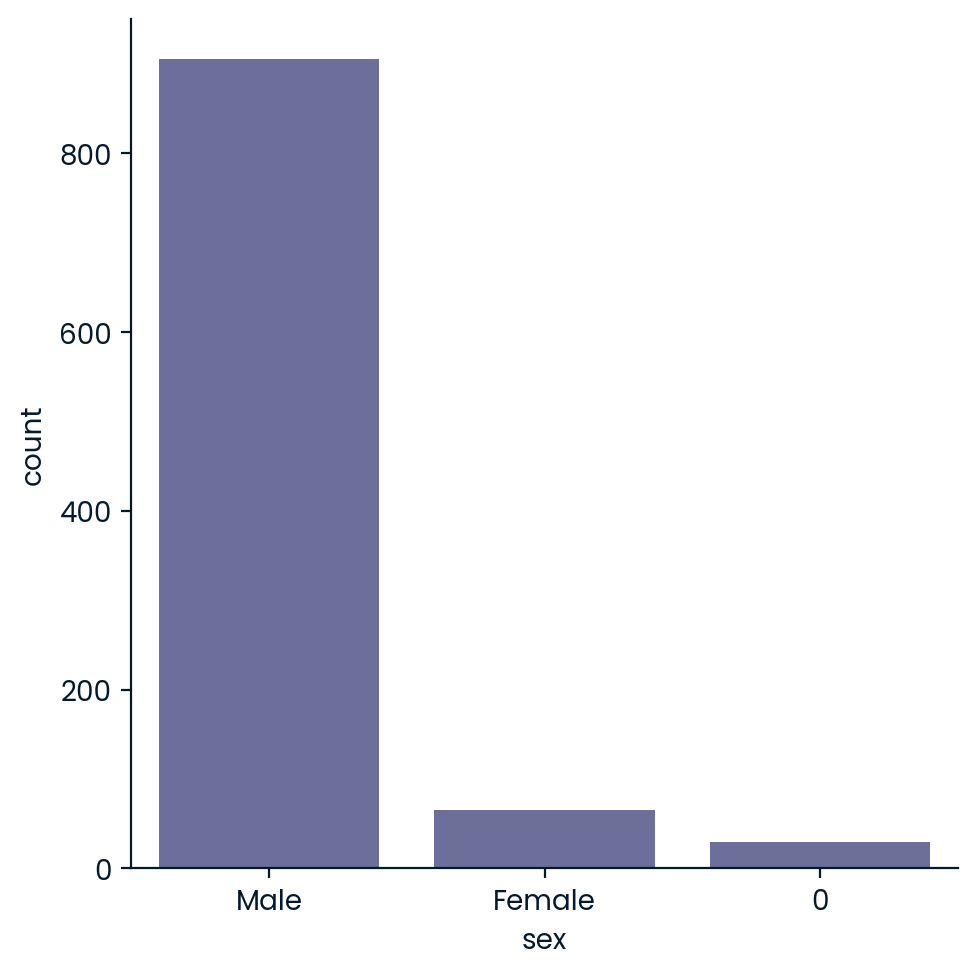

In [242]:
sns.catplot(x="sex", data=nobel, kind="count")
plt.show()

In [243]:
top_country = nobel["birth_country"].value_counts()

In [244]:
top_country.head()

United States of America    291
United Kingdom               91
Germany                      67
France                       58
0                            31
Name: birth_country, dtype: int64

In [245]:
top_country = "United States of America"

In [246]:
nobel["us_born"] = nobel["birth_country"]=="United States of America"

In [247]:
nobel["decade"] = (np.floor(nobel["year"]/10) * 10).astype(int)

In [248]:
average_decade_usa = nobel.groupby("decade", as_index=False)["us_born"].mean()

In [249]:
max_decade_usa = average_decade_usa[average_decade_usa["us_born"] == average_decade_usa["us_born"].max()]["decade"]

In [250]:
max_decade_usa

10    2000
Name: decade, dtype: int64

In [251]:
max_decade_usa = 2000

In [252]:
nobel["female_alureate"] = nobel["sex"]=="Female"

In [253]:
max_female_laureate = nobel.groupby(["decade", "category"], as_index=False)["female_alureate"].mean()

In [254]:
max_female_laureate = max_female_laureate[max_female_laureate["female_alureate"] == max_female_laureate["female_alureate"].max()][["decade", "category"]]

In [255]:
max_female_laureate= max_female_laureate.max()

In [256]:
max_female_laureate

decade            2020
category    Literature
dtype: object

In [257]:
max_female_dict = {max_female_laureate["decade"]: max_female_laureate["category"]}

In [258]:
max_female_dict

{2020: 'Literature'}

In [259]:
female_only = nobel[nobel["female_alureate"]]

In [260]:
female_only["year"].min()

1903

In [261]:
female_only.groupby(["full_name", "category"])["year"].min()

full_name             category  
Ada E. Yonath         Chemistry     2009
Alice Munro           Literature    2013
Alva Myrdal           Peace         1982
Andrea Ghez           Physics       2020
Anne L’Huillier       Physics       2023
                                    ... 
Tawakkol Karman       Peace         2011
Toni Morrison         Literature    1993
Wangari Muta Maathai  Peace         2004
Wislawa Szymborska    Literature    1996
Youyou Tu             Medicine      2015
Name: year, Length: 65, dtype: int64

In [262]:
first_woman_name = str("Marie Curie, née Sklodowska")

In [263]:
first_woman_category = str("Physics")

In [264]:
counts = nobel["full_name"].value_counts()
repeat = counts[counts>=2].index
repeat_list = list(repeat)

In [265]:
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']